<a href="https://colab.research.google.com/github/swaprash/NLP/blob/master/Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [19]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [20]:
tokenizer=info.features['text'].encoder

In [21]:
BUFFER_SIZE=10000
BATCH_SIZE=64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE,tf.compat.v1.data.get_output_shapes(test_dataset))

In [22]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(tokenizer.vocab_size,64),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
NUM_EPOCHS=10
history=model.fit(train_dataset, epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 61s 156ms/step - loss: 0.5576 - accuracy: 0.7115 - val_loss: 0.5291 - val_accuracy: 0.7664
Epoch 2/10
391/391 [==============================] - 61s 156ms/step - loss: 0.3825 - accuracy: 0.8441 - val_loss: 0.4912 - val_accuracy: 0.8144
Epoch 3/10
391/391 [==============================] - 61s 156ms/step - loss: 0.3276 - accuracy: 0.8753 - val_loss: 0.4047 - val_accuracy: 0.8370
Epoch 4/10
391/391 [==============================] - 61s 155ms/step - loss: 0.3072 - accuracy: 0.8766 - val_loss: 0.4704 - val_accuracy: 0.8071
Epoch 5/10
391/391 [==============================] - 61s 156ms/step - loss: 0.2392 - accuracy: 0.9107 - val_loss: 0.4299 - val_accuracy: 0.8165
Epoch 6/10
391/391 [==============================] - 61s 157ms/step - loss: 0.1908 - accuracy: 0.9311 - val_loss: 0.4194 - val_accuracy: 0.8388
Epoch 7/10
391/391 [==============================] - 60s 155ms/step - loss: 0.1645 - accuracy: 0.9411 - val_loss: 0.5066 - val_ac

In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

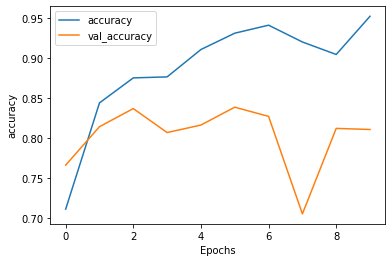

In [27]:
plot_graphs(history, 'accuracy')

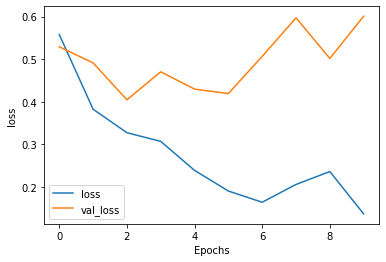

In [28]:
plot_graphs(history, 'loss')